In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 



In [34]:
def market_beta(X,Y,N):
    """ 
    X = The independent variable which is the Market
    Y = The dependent variable which is the Stock
    N = The length of the Window
    
    It returns the alphas and the betas of
    the rolling regression
    https://python-bloggers.com/2021/01/stocks-market-beta-with-rolling-regression/
    """
    
    # all the observations
    obs = len(X)
    
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
    
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
    
    
    for i in range((obs-N)):
        regressor = LinearRegression()
        regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
        
        betas[i+N]  = regressor.coef_[0]
        alphas[i+N]  = regressor.intercept_

    return(alphas, betas)
 
    
def return_beta_data(symbol, marketsymbol, window):
    equity = yf.download(symbol, start='2019-01-30', end='2021-03-10', progress=False)['Close']
    equity = pd.DataFrame(equity)
    equity['equity_return'] = equity['Close'].pct_change()
    equity['equity_log_return'] = np.log(equity['Close']) - np.log(equity['Close'].shift(1))
    equity.dropna(inplace=True)

    market = yf.download(marketsymbol, start='2019-01-30', end='2021-03-10', progress=False)['Close']
    market = pd.DataFrame(market)
    market['market_return'] = market['Close'].pct_change()
    market['market_log_return'] = np.log(market['Close']) - np.log(market['Close'].shift(1))
    market.dropna(inplace=True)

    results = market_beta(equity.equity_return, market.market_return, window)
    results = pd.DataFrame(list(zip(*results)), columns = ['alpha', 'beta'])
    results.index = equity.index
    return results, equity, market


### Lots of sites can calculate beta different ways. Here's one, just downloading close-close data and running a regression over a window. In this first scenario, its AMZN vs SPY on a rolling 10 day window.

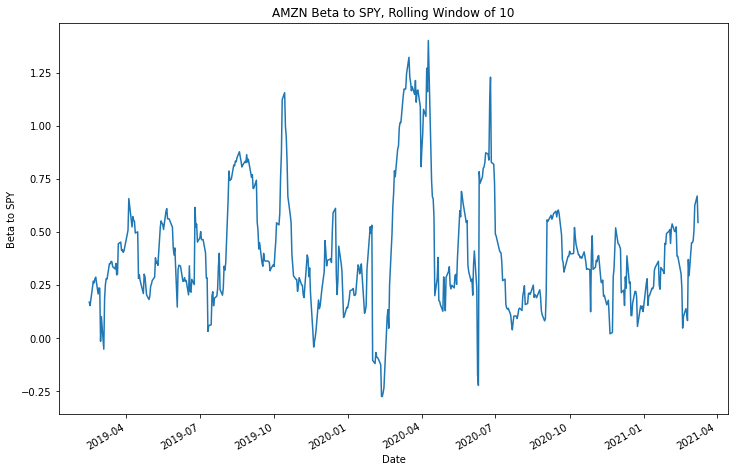

In [32]:
symbol = 'AMZN'
marketsymbol = 'SPY'
window = 10

results, _, _ = return_beta_data(symbol, marketsymbol, window)

plt.figure(figsize=(12,8))
results.beta.plot.line()
plt.title("{} Beta to SPY, Rolling Window of {}".format(symbol, window))
plt.ylabel('Beta to SPY')
plt.show()

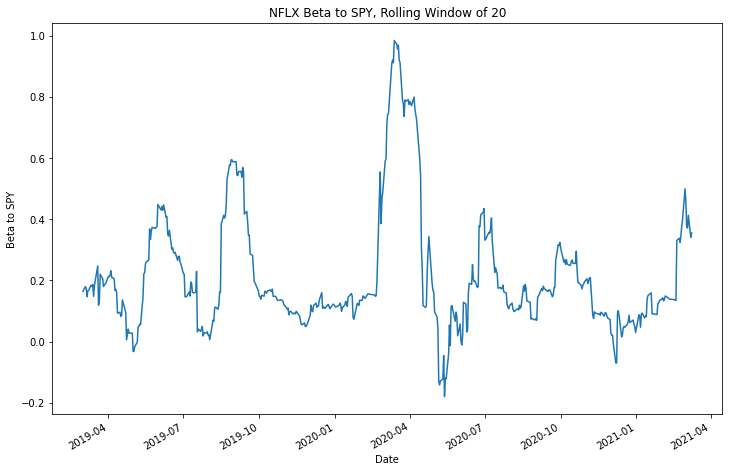

In [29]:
symbol = 'NFLX'
marketsymbol = 'SPY'
window = 20

results, _, _ = return_beta_data(symbol, marketsymbol, window)

plt.figure(figsize=(12,8))
results.beta.plot.line()
plt.title("{} Beta to SPY, Rolling Window of {}".format(symbol, window))
plt.ylabel('Beta to SPY')
plt.show()

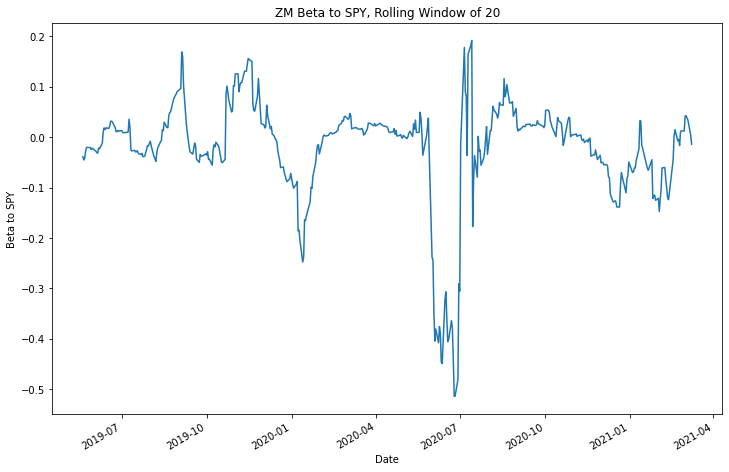

In [30]:
symbol = 'ZM'
marketsymbol = 'SPY'
window = 20

results, _, _ = return_beta_data(symbol, marketsymbol, window)

plt.figure(figsize=(12,8))
results.beta.plot.line()
plt.title("{} Beta to SPY, Rolling Window of {}".format(symbol, window))
plt.ylabel('Beta to SPY')
plt.show()

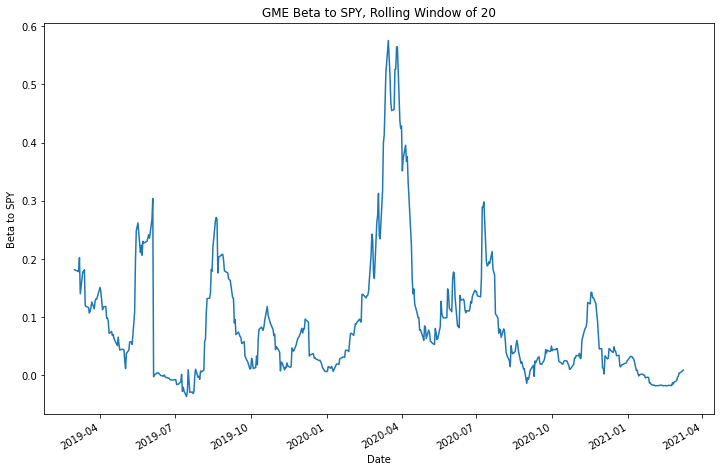

In [36]:
symbol = 'GME'
marketsymbol = 'SPY'
window = 20

results, gme, spy = return_beta_data(symbol, marketsymbol, window)

plt.figure(figsize=(12,8))
results.beta.plot.line()
plt.title("{} Beta to SPY, Rolling Window of {}".format(symbol, window))
plt.ylabel('Beta to SPY')
plt.show()

### Scatterplot of returns for GME vs SPY, the slope of the line is the beta.

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'spy return')

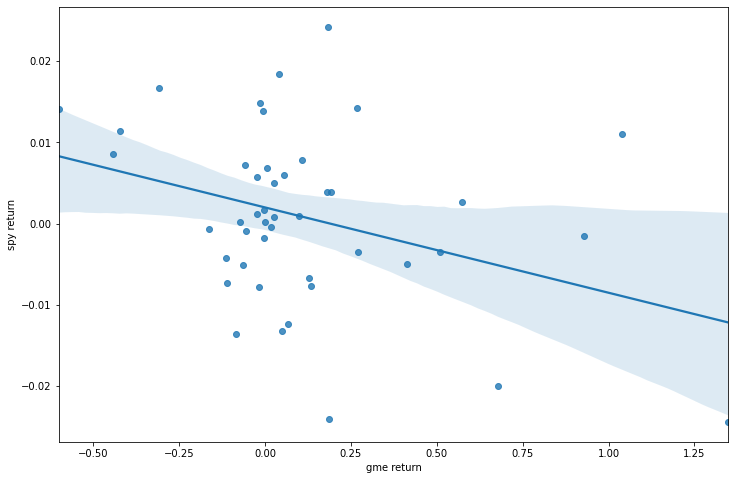

In [46]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.regplot(gme.loc['2021-01-01':'2021-03-10'].equity_return, spy.loc['2021-01-01':'2021-03-10'].market_return)
plt.xlabel('gme return')
plt.ylabel('spy return')

### Take out the two biggest up & down days for GME

In [57]:
indices = [date for date in gme.index if str(date)[:10] not in ['2021-01-27', '2021-02-02']]

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


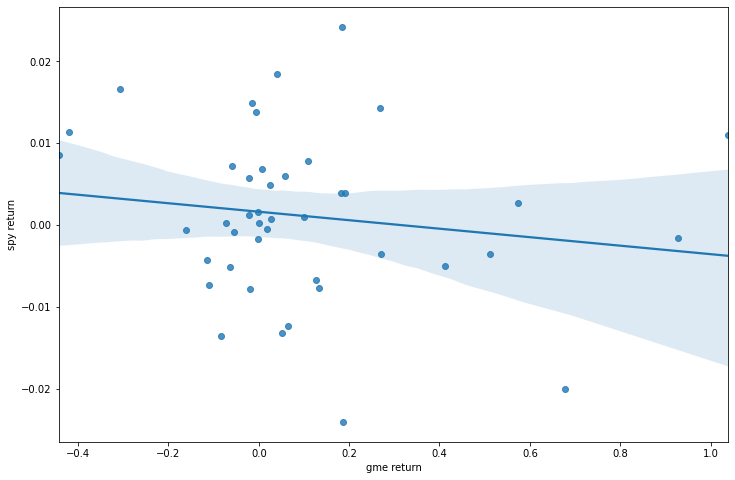

In [64]:
gme.loc[indices].loc['2021-01-01':'2021-03-10']
import seaborn as sns
plt.figure(figsize=(12,8))
sns.regplot(gme.loc[indices].loc['2021-01-01':'2021-03-10'].equity_return, spy.loc[indices].loc['2021-01-01':'2021-03-10'].market_return)
plt.xlabel('gme return')
plt.ylabel('spy return')
plt.show()

### After removing the two biggest up/down days for GME, the beta flattens and there's no real discernible relationship.